In [1]:
import pandas as pd

In [2]:
!pip install geopandas

     |████████████████████████████████| 972kB 8.7MB/s 
     |████████████████████████████████| 14.7MB 312kB/s 
     |████████████████████████████████| 10.9MB 60.3MB/s 


In [4]:
import geopandas as gpd
boarder_1=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/08.행정경계(시군구).geojson')
boarder_2=gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/09.행정경계(읍면동).geojson')
population = pd.read_csv('/content/drive/My Drive/Compas/compas/SBJ_2007_001/07.인구통계.csv')

In [265]:
df_19 = pd.read_csv('/content/drive/My Drive/Compas/compas/SBJ_2007_001/19.전철역_공간정보.csv')
df_20 = pd.read_csv('/content/drive/My Drive/Compas/compas/SBJ_2007_001/20.고양시 버스정류소.csv')
df_21 = pd.read_csv('/content/drive/My Drive/Compas/compas/SBJ_2007_001/21.버스 정류장별 승하차 정보.csv')
df_29 = pd.read_csv('/content/drive/My Drive/Compas/compas/SBJ_2007_001/29.지하철 역별 이용객수.csv')

## 지하철 & 전철

df_19 
현재 기준의 고양시 전철역 위치 정보입니다.

- rail_nm    해당 역의 호선 명입니다.
- station_nm    역 명입니다.
- lot_num_addr    해당 역의 지번 주소입니다.
- road_nm_addr    해당 역의 도로명 주소입니다.
- X    지하철역의 위도 입니다.
- Y    지하철역의 경도 입니다.

In [266]:
# df_29와 역이름 통일 시키기 

df_19['station_nm'] = df_19['station_nm'].str.replace("\(","")
df_19['station_nm'] = df_19['station_nm'].str.replace("역","")
df_19['station_nm'] = df_19['station_nm'].str.replace("\)","")
df_19['station_nm'] = df_19['station_nm'].str.replace("한국항공대","")
df_19

,rail_nm,station_nm,lot_num_addr,road_nm_addr,X,Y
0,3호선,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,126.809614,37.632306
1,3호선,대화,경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,126.747206,37.675846
2,경의중앙,일산,경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,126.770067,37.682007
3,3호선,백석,경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,126.788148,37.642953
4,경의중앙,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,126.811047,37.631615
5,경의중앙,강매,경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,126.844436,37.612290
6,경의중앙,백마,경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,126.794067,37.658431
7,경의중앙,능곡,경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,126.820838,37.618765
8,경의중앙,풍산,경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,126.786528,37.671815
9,경의중앙,행신,경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,126.834117,37.612170


In [267]:
df_19['station_nm'].unique(), len(df_19['station_nm'].unique())

(array(['대곡', '대화', '일산', '백석', '강매', '백마', '능곡', '풍산', '행신', '화전', '탄현',
        '주엽', '정발산', '마두', '화정', '곡산', '원흥', '원당', '삼송', '지축'],
       dtype=object), 20)

2018년 고양시 전철/지하철 역별 이용객 수 정보입니다.
- 호선명    해당 역의 호선 명입니다.
- 역명    역 명입니다.
- 행정구역    해당 역의 행정구역(동) 입니다.
- 년월구분    해당 라인 데이터의 년월구분 입니다.
- 승하차구분    해당 라인 데이터의 승하차구분 입니다.
- 월요일_합계    해당 역의 승하차 구분별 월요일 합계입니다.
- 화요일_합계    해당 역의 승하차 구분별 화요일 합계입니다.
- 수요일_합계    해당 역의 승하차 구분별 수요일 합계입니다.
- 목요일_합계    해당 역의 승하차 구분별 목요일 합계입니다.
- 금요일_합계    해당 역의 승하차 구분별 금요일 합계입니다.
- 토요일_합계    해당 역의 승하차 구분별 토요일 합계입니다.
- 일요일_합계    해당 역의 승하차 구분별 일요일 합계입니다.
- 모든요일_합계    해당 역의 승하차 구분별 모든요일 합계입니다.
- 월요일_평균    해당 역의 승하차 구분별 월요일 평균입니다.
- 화요일_평균    해당 역의 승하차 구분별 화요일 평균입니다.
- 수요일_평균    해당 역의 승하차 구분별 수요일 평균입니다.
- 목요일_평균    해당 역의 승하차 구분별 목요일 평균입니다.
- 금요일_평균    해당 역의 승하차 구분별 금요일 평균입니다.
- 토요일_평균    해당 역의 승하차 구분별 토요일 평균입니다.
- 일요일_평균    해당 역의 승하차 구분별 일요일 평균입니다.
- 모든요일_평균    해당 역의 승하차 구분별 모든요일 평균입니다.


In [268]:
df_29

,호선명,역명,행정구역,년월구분,승하차구분,월요일_합계,화요일_합계,수요일_합계,목요일_합계,금요일_합계,토요일_합계,일요일_합계,모든요일_합계,월요일_평균,화요일_평균,수요일_평균,목요일_평균,금요일_평균,토요일_평균,일요일_평균,모든요일_평균
0,3호선,지축,___효자동(경기고양덕양),연간합계,승차,73291.0,73511.0,73687.0,74677.0,62626.0,44084.0,74138.0,476014,1409.0,1414.0,1417.0,1436.0,1204.0,848.0,1399.0,1304
1,3호선,지축,___효자동(경기고양덕양),연간합계,하차,82890.0,82307.0,84042.0,84923.0,68679.0,49259.0,84346.0,536446,1594.0,1583.0,1616.0,1633.0,1321.0,947.0,1591.0,1470
2,3호선,지축,___효자동(경기고양덕양),연간합계,총승하차,156181.0,155818.0,157729.0,159600.0,131305.0,93343.0,158484.0,1012460,3003.0,2997.0,3033.0,3069.0,2525.0,1795.0,2990.0,2774
3,경의선,화전,___화전동(경기고양덕양),연간합계,승차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,928786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,경의선,화전,___화전동(경기고양덕양),연간합계,하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,일산선,주엽,___주엽1동(경기고양일산서),연간합계,하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3674119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
59,일산선,주엽,___주엽1동(경기고양일산서),연간합계,총승하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7234466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
60,일산선,대화,___대화동(경기고양일산서),연간합계,승차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5547363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
61,일산선,대화,___대화동(경기고양일산서),연간합계,하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4460662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [269]:
# 지축역은 3호선과 일산선으로 구분되어 집계 / 전체 이용량이 중요하므로 추후에 합침 
df_29[df_29['역명']=='지축']

,호선명,역명,행정구역,년월구분,승하차구분,월요일_합계,화요일_합계,수요일_합계,목요일_합계,금요일_합계,토요일_합계,일요일_합계,모든요일_합계,월요일_평균,화요일_평균,수요일_평균,목요일_평균,금요일_평균,토요일_평균,일요일_평균,모든요일_평균
0,3호선,지축,___효자동(경기고양덕양),연간합계,승차,73291.0,73511.0,73687.0,74677.0,62626.0,44084.0,74138.0,476014,1409.0,1414.0,1417.0,1436.0,1204.0,848.0,1399.0,1304
1,3호선,지축,___효자동(경기고양덕양),연간합계,하차,82890.0,82307.0,84042.0,84923.0,68679.0,49259.0,84346.0,536446,1594.0,1583.0,1616.0,1633.0,1321.0,947.0,1591.0,1470
2,3호선,지축,___효자동(경기고양덕양),연간합계,총승하차,156181.0,155818.0,157729.0,159600.0,131305.0,93343.0,158484.0,1012460,3003.0,2997.0,3033.0,3069.0,2525.0,1795.0,2990.0,2774
33,일산선,지축,___효자동(경기고양덕양),연간합계,승차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34,일산선,지축,___효자동(경기고양덕양),연간합계,하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
35,일산선,지축,___효자동(경기고양덕양),연간합계,총승하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [270]:
# 대곡역은 경의중앙과 3호선의 환승역이지만 데이터는 하나만 존재 => 체크
df_29[df_29['역명']=='대곡']

,호선명,역명,행정구역,년월구분,승하차구분,월요일_합계,화요일_합계,수요일_합계,목요일_합계,금요일_합계,토요일_합계,일요일_합계,모든요일_합계,월요일_평균,화요일_평균,수요일_평균,목요일_평균,금요일_평균,토요일_평균,일요일_평균,모든요일_평균
45,일산선,대곡,___운중동(경기성남분당),연간합계,승차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
46,일산선,대곡,___운중동(경기성남분당),연간합계,하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
47,일산선,대곡,___운중동(경기성남분당),연간합계,총승하차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [271]:
df_29['호선명'].unique(), len(df_29['호선명'].unique())

(array(['3호선', '경의선', '경원선', '일산선'], dtype=object), 4)

In [272]:
# 호선명 2020기준으로 통일 => 경원선, 일산선 3호선으로 통일 
df_29['호선명'] = df_29['호선명'].str.replace("일산선","3호선")
df_29['호선명'] = df_29['호선명'].str.replace("경원선","3호선")
df_29['호선명'] = df_29['호선명'].str.replace("경의선","경의중앙")
df_29['호선명'].unique()

array(['3호선', '경의중앙'], dtype=object)

In [273]:
df_승차 = df_29[df_29['승하차구분']=='승차'].reset_index()['모든요일_합계']  
df_하차 = df_29[df_29['승하차구분']=='하차'].reset_index()['모든요일_합계']
df_승하차 = df_29[df_29['승하차구분']=='총승하차'].reset_index()['모든요일_합계']

In [274]:
df_하차

0      536446
1      870375
2      866571
3     2725061
4     1265362
5      201535
6     2283058
7     1728742
8     3377383
9     2626648
10    2720898
11      85268
12    5649572
13    4214589
14    7423722
15     475595
16    4261695
17    3167961
18    3527251
19    3674119
20    4460662
Name: 모든요일_합계, dtype: int64

In [275]:
df_29 = df_29[df_29['승하차구분']=='승차'].reset_index()[['호선명', '역명', '행정구역']]
df_29['승차_연간합계'] = df_승차
df_29['하차_연간합계'] = df_하차
df_29['승하차_연간합계'] = df_승하차
df_29

,호선명,역명,행정구역,승차_연간합계,하차_연간합계,승하차_연간합계
0,3호선,지축,___효자동(경기고양덕양),476014,536446,1012460
1,경의중앙,화전,___화전동(경기고양덕양),928786,870375,1799161
2,경의중앙,강매,___행신2동(경기고양덕양),993149,866571,1859720
3,경의중앙,행신,___행신2동(경기고양덕양),2843071,2725061,5568132
4,경의중앙,능곡,___능곡동(경기고양덕양),1372493,1265362,2637855
5,경의중앙,곡산,___풍산동(경기고양일산동),202878,201535,404413
6,경의중앙,백마,___풍산동(경기고양일산동),2450784,2283058,4733842
7,경의중앙,풍산,___풍산동(경기고양일산동),1848304,1728742,3577046
8,경의중앙,일산,___일산2동(경기고양일산서),3430691,3377383,6808074
9,경의중앙,탄현,___송산동(경기고양일산서),2729679,2626648,5356327


df_19와 df_29 합치기 

In [276]:
df_subway = df_19.merge(df_29, how = 'left', left_on = 'station_nm', right_on = '역명')
df_subway

,rail_nm,station_nm,lot_num_addr,road_nm_addr,X,Y,호선명,역명,행정구역,승차_연간합계,하차_연간합계,승하차_연간합계
0,3호선,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,126.809614,37.632306,3호선,대곡,___운중동(경기성남분당),619157,475595,1094752
1,3호선,대화,경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,126.747206,37.675846,3호선,대화,___대화동(경기고양일산서),5547363,4460662,10008025
2,경의중앙,일산,경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,126.770067,37.682007,경의중앙,일산,___일산2동(경기고양일산서),3430691,3377383,6808074
3,3호선,백석,경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,126.788148,37.642953,3호선,백석,___백석1동(경기고양일산동),4271531,4261695,8533226
4,경의중앙,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,126.811047,37.631615,3호선,대곡,___운중동(경기성남분당),619157,475595,1094752
5,경의중앙,강매,경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,126.844436,37.612290,경의중앙,강매,___행신2동(경기고양덕양),993149,866571,1859720
6,경의중앙,백마,경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,126.794067,37.658431,경의중앙,백마,___풍산동(경기고양일산동),2450784,2283058,4733842
7,경의중앙,능곡,경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,126.820838,37.618765,경의중앙,능곡,___능곡동(경기고양덕양),1372493,1265362,2637855
8,경의중앙,풍산,경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,126.786528,37.671815,경의중앙,풍산,___풍산동(경기고양일산동),1848304,1728742,3577046
9,경의중앙,행신,경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,126.834117,37.612170,경의중앙,행신,___행신2동(경기고양덕양),2843071,2725061,5568132


In [277]:
# 지축역은 3호선과 일산선으로 구분되어 집계 / 전체 이용량이 중요하므로 합침 
# df_subway.iloc[20]['승차_연간합계'] + df_subway.iloc[21]['승차_연간합계'], df_subway.iloc[20]['하차_연간합계'] + df_subway.iloc[21]['하차_연간합계'], df_subway.iloc[20]['승하차_연간합계'] + df_subway.iloc[21]['승하차_연간합계']
df_subway.loc[20, '승차_연간합계'] = 561124
df_subway.loc[20, '하차_연간합계'] = 621714
df_subway.loc[20, '승하차_연간합계'] = 1182838
df_subway = df_subway.iloc[:-1]
df_subway

,rail_nm,station_nm,lot_num_addr,road_nm_addr,X,Y,호선명,역명,행정구역,승차_연간합계,하차_연간합계,승하차_연간합계
0,3호선,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,126.809614,37.632306,3호선,대곡,___운중동(경기성남분당),619157,475595,1094752
1,3호선,대화,경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,126.747206,37.675846,3호선,대화,___대화동(경기고양일산서),5547363,4460662,10008025
2,경의중앙,일산,경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,126.770067,37.682007,경의중앙,일산,___일산2동(경기고양일산서),3430691,3377383,6808074
3,3호선,백석,경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,126.788148,37.642953,3호선,백석,___백석1동(경기고양일산동),4271531,4261695,8533226
4,경의중앙,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,126.811047,37.631615,3호선,대곡,___운중동(경기성남분당),619157,475595,1094752
5,경의중앙,강매,경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,126.844436,37.612290,경의중앙,강매,___행신2동(경기고양덕양),993149,866571,1859720
6,경의중앙,백마,경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,126.794067,37.658431,경의중앙,백마,___풍산동(경기고양일산동),2450784,2283058,4733842
7,경의중앙,능곡,경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,126.820838,37.618765,경의중앙,능곡,___능곡동(경기고양덕양),1372493,1265362,2637855
8,경의중앙,풍산,경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,126.786528,37.671815,경의중앙,풍산,___풍산동(경기고양일산동),1848304,1728742,3577046
9,경의중앙,행신,경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,126.834117,37.612170,경의중앙,행신,___행신2동(경기고양덕양),2843071,2725061,5568132


In [297]:
import re

df_subway['동이름'] = df_subway['행정구역'].map(lambda x: re.findall('\___(.+?)\(', x)[0])
df_subway['동이름'] = df_subway['동이름'].map(lambda x: re.sub('[0-9]', "", x))
df_subway

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,rail_nm,역명,행정구역,lot_num_addr,road_nm_addr,Y,X,승차_연간합계,하차_연간합계,승하차_연간합계,동이름
0,3호선,대곡,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,37.632306,126.809614,619157,475595,1094752,운중동
1,3호선,대화,___대화동(경기고양일산서),경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,37.675846,126.747206,5547363,4460662,10008025,대화동
2,경의중앙,일산,___일산2동(경기고양일산서),경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,37.682007,126.770067,3430691,3377383,6808074,일산동
3,3호선,백석,___백석1동(경기고양일산동),경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,37.642953,126.788148,4271531,4261695,8533226,백석동
4,경의중앙,대곡,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,37.631615,126.811047,619157,475595,1094752,운중동
5,경의중앙,강매,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,37.612290,126.844436,993149,866571,1859720,행신동
6,경의중앙,백마,___풍산동(경기고양일산동),경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,37.658431,126.794067,2450784,2283058,4733842,풍산동
7,경의중앙,능곡,___능곡동(경기고양덕양),경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,37.618765,126.820838,1372493,1265362,2637855,능곡동
8,경의중앙,풍산,___풍산동(경기고양일산동),경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,37.671815,126.786528,1848304,1728742,3577046,풍산동
9,경의중앙,행신,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,37.612170,126.834117,2843071,2725061,5568132,행신동


In [298]:
# 대곡역 2개 (승차/ 하차/ 승하차 정보는 동일 )
df_subway = df_subway[['rail_nm', '역명', '동이름', '행정구역', 'lot_num_addr', 'road_nm_addr','Y', 'X', '승차_연간합계', '하차_연간합계', '승하차_연간합계']]
df_subway 

,rail_nm,역명,동이름,행정구역,lot_num_addr,road_nm_addr,Y,X,승차_연간합계,하차_연간합계,승하차_연간합계
0,3호선,대곡,운중동,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,37.632306,126.809614,619157,475595,1094752
1,3호선,대화,대화동,___대화동(경기고양일산서),경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,37.675846,126.747206,5547363,4460662,10008025
2,경의중앙,일산,일산동,___일산2동(경기고양일산서),경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,37.682007,126.770067,3430691,3377383,6808074
3,3호선,백석,백석동,___백석1동(경기고양일산동),경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,37.642953,126.788148,4271531,4261695,8533226
4,경의중앙,대곡,운중동,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,37.631615,126.811047,619157,475595,1094752
5,경의중앙,강매,행신동,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,37.612290,126.844436,993149,866571,1859720
6,경의중앙,백마,풍산동,___풍산동(경기고양일산동),경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,37.658431,126.794067,2450784,2283058,4733842
7,경의중앙,능곡,능곡동,___능곡동(경기고양덕양),경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,37.618765,126.820838,1372493,1265362,2637855
8,경의중앙,풍산,풍산동,___풍산동(경기고양일산동),경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,37.671815,126.786528,1848304,1728742,3577046
9,경의중앙,행신,행신동,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,37.612170,126.834117,2843071,2725061,5568132


In [299]:
df_subway.columns = ['호선명', '역명', '행정구역', '행정구역_전체', '지번주소', '도로명주소', '지하철_위도', '지하철_경도', '승차_연간합계', '하차_연간합계', '승하차_연간합계']
df_subway

,호선명,역명,행정구역,행정구역_전체,지번주소,도로명주소,지하철_위도,지하철_경도,승차_연간합계,하차_연간합계,승하차_연간합계
0,3호선,대곡,운중동,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,37.632306,126.809614,619157,475595,1094752
1,3호선,대화,대화동,___대화동(경기고양일산서),경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,37.675846,126.747206,5547363,4460662,10008025
2,경의중앙,일산,일산동,___일산2동(경기고양일산서),경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,37.682007,126.770067,3430691,3377383,6808074
3,3호선,백석,백석동,___백석1동(경기고양일산동),경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,37.642953,126.788148,4271531,4261695,8533226
4,경의중앙,대곡,운중동,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,37.631615,126.811047,619157,475595,1094752
5,경의중앙,강매,행신동,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,37.612290,126.844436,993149,866571,1859720
6,경의중앙,백마,풍산동,___풍산동(경기고양일산동),경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,37.658431,126.794067,2450784,2283058,4733842
7,경의중앙,능곡,능곡동,___능곡동(경기고양덕양),경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,37.618765,126.820838,1372493,1265362,2637855
8,경의중앙,풍산,풍산동,___풍산동(경기고양일산동),경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,37.671815,126.786528,1848304,1728742,3577046
9,경의중앙,행신,행신동,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,37.612170,126.834117,2843071,2725061,5568132


In [300]:
df_subway

,호선명,역명,행정구역,행정구역_전체,지번주소,도로명주소,지하철_위도,지하철_경도,승차_연간합계,하차_연간합계,승하차_연간합계
0,3호선,대곡,운중동,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,37.632306,126.809614,619157,475595,1094752
1,3호선,대화,대화동,___대화동(경기고양일산서),경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,37.675846,126.747206,5547363,4460662,10008025
2,경의중앙,일산,일산동,___일산2동(경기고양일산서),경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,37.682007,126.770067,3430691,3377383,6808074
3,3호선,백석,백석동,___백석1동(경기고양일산동),경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,37.642953,126.788148,4271531,4261695,8533226
4,경의중앙,대곡,운중동,___운중동(경기성남분당),경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,37.631615,126.811047,619157,475595,1094752
5,경의중앙,강매,행신동,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,37.612290,126.844436,993149,866571,1859720
6,경의중앙,백마,풍산동,___풍산동(경기고양일산동),경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,37.658431,126.794067,2450784,2283058,4733842
7,경의중앙,능곡,능곡동,___능곡동(경기고양덕양),경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,37.618765,126.820838,1372493,1265362,2637855
8,경의중앙,풍산,풍산동,___풍산동(경기고양일산동),경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,37.671815,126.786528,1848304,1728742,3577046
9,경의중앙,행신,행신동,___행신2동(경기고양덕양),경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,37.612170,126.834117,2843071,2725061,5568132


In [301]:
df_subway.to_csv('subway_merged.csv', index = False)

## 버스

df 20 
현재 기준의 고양시 버스 정류소, 마을버스 정류소 위치 정보입니다.

- STATION_NM    버스정류장 명 입니다.
- STATION_ID    버스정류장 고유 ID 입니다.
- X    버스정류장의 위도 입니다.
- Y    버스정류장의 경도 입니다.

In [21]:
df_20

,STATION_NM,STATION_ID,X,Y
0,신일비즈니스고등학교,219000619,126.760592,37.683296
1,중앙공원삼거리,219000587,126.776989,37.688934
2,문촌마을14.19단지,219000624,126.752451,37.671011
3,문촌마을14.19단지,219000623,126.752452,37.671448
4,중앙공원삼거리,219000586,126.777412,37.688771
...,...,...,...,...
2227,고양시청후문,218000940,126.832676,37.659090
2228,사리현동문아파트,219000927,126.845347,37.699382
2229,서울시립고양병원입구,218000530,126.852005,37.712236
2230,옥빛마을14.15단지,218001000,126.833325,37.628699


df_21
최근 1년치 고양시 버스 정류장별 승하차 정보입니다.

- STATION_ID    버스정류장 고유 ID 입니다.
- STATION_NM    버스정류장 명 입니다.
- GETON_CNT    버스정류장 승차인원 수 입니다.

In [22]:
df_21

,STATION_ID,STATION_NM,GETON_CNT
0,218001046,화정역3호선,229091
1,218001083,원당역,219186
2,218000974,화정역3호선,197084
3,219000193,대화역,191696
4,219000193,대화역,169990
...,...,...,...
2883,218001029,매화정,0
2884,219000139,탄현마을6.7단지,0
2885,219000425,송포초교,0
2886,219001082,둥지마을.베송쥬쥬,0


In [23]:
df_20['STATION_ID'].unique(), len(df_20['STATION_ID'].unique())

(array([219000619, 219000587, 219000624, ..., 218000530, 218001000,
        218000353]), 2232)

In [24]:
df_21['STATION_ID'].unique(), len(df_21['STATION_ID'].unique())

(array([218001046, 218001083, 218000974, ..., 218000827, 218000888,
        218001029]), 2145)

In [25]:
# df20과 df21 합치기
# row의 개수는 df21이 많지만, unique한 정류장 ID의 개수는 df20이 많으므로 => df20기준으로 merge 

df_bus = df_20.merge(df_21, how='left', on = 'STATION_ID')
df_bus

,STATION_NM_x,STATION_ID,X,Y,STATION_NM_y,GETON_CNT
0,신일비즈니스고등학교,219000619,126.760592,37.683296,신일비즈니스고등학교,3496.0
1,중앙공원삼거리,219000587,126.776989,37.688934,중앙공원삼거리,2666.0
2,문촌마을14.19단지,219000624,126.752451,37.671011,NaN,NaN
3,문촌마을14.19단지,219000623,126.752452,37.671448,문촌마을14.19단지,251.0
4,문촌마을14.19단지,219000623,126.752452,37.671448,문촌마을14.19단지,47.0
...,...,...,...,...,...,...
2969,사리현동문아파트,219000927,126.845347,37.699382,사리현동문아파트,5868.0
2970,서울시립고양병원입구,218000530,126.852005,37.712236,서울시립고양병원입구,4746.0
2971,서울시립고양병원입구,218000530,126.852005,37.712236,서울시립고양병원입구,737.0
2972,옥빛마을14.15단지,218001000,126.833325,37.628699,옥빛마을14.15단지,5023.0


In [26]:
df_bus.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 0 to 2973
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION_NM_x  2974 non-null   object 
 1   STATION_ID    2974 non-null   int64  
 2   X             2974 non-null   float64
 3   Y             2974 non-null   float64
 4   STATION_NM_y  2824 non-null   object 
 5   GETON_CNT     2824 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 162.6+ KB


### 1. 정류장 이름 비교

In [27]:
df_bus[df_bus['STATION_NM_x'] != df_bus['STATION_NM_y']]['STATION_NM_y'].unique()

array([nan, '원신동행정복지센터'], dtype=object)

In [28]:
df_bus[df_bus['STATION_NM_y']=='원신동행정복지센터']

,STATION_NM_x,STATION_ID,X,Y,STATION_NM_y,GETON_CNT
386,원신동행정복지센터,218000150,126.875192,37.676312,원신동행정복지센터,433.0
399,원신동행정복지센터,218000130,126.875540,37.676237,원신동행정복지센터,247.0
1384,원신동행정복지센터(마을),218000856,126.876607,37.676902,원신동행정복지센터,749.0


확인 결과, df_20에만 있는 정류장이거나 추가 정보가 들어있는 정류장들이므로 df_20의 정류장 이름을 기준으로 정리

### 2. 중복값 처리
- ID별로 같은 ID면 합치기 

In [29]:
df_bus.duplicated().value_counts() 

False    2974
dtype: int64

In [30]:
df_ID = df_bus.groupby(['STATION_ID'], as_index = False).sum()
df_ID = df_ID[['STATION_ID','GETON_CNT']]
df_ID

,STATION_ID,GETON_CNT
0,218000001,1.0
1,218000002,13.0
2,218000003,844.0
3,218000004,1368.0
4,218000005,2492.0
...,...,...
2227,219515030,26.0
2228,229000001,4321.0
2229,241500020,193.0
2230,241501020,413.0


In [31]:
df_bus = df_bus.merge(df_ID, how='left', on = 'STATION_ID')
df_bus = df_bus[['STATION_ID', 'STATION_NM_x', 'Y', 'X', 'GETON_CNT_y']].drop_duplicates('STATION_ID')
df_bus

,STATION_ID,STATION_NM_x,Y,X,GETON_CNT_y
0,219000619,신일비즈니스고등학교,37.683296,126.760592,3496.0
1,219000587,중앙공원삼거리,37.688934,126.776989,2666.0
2,219000624,문촌마을14.19단지,37.671011,126.752451,0.0
3,219000623,문촌마을14.19단지,37.671448,126.752452,298.0
5,219000586,중앙공원삼거리,37.688771,126.777412,25.0
...,...,...,...,...,...
2968,218000940,고양시청후문,37.659090,126.832676,788.0
2969,219000927,사리현동문아파트,37.699382,126.845347,5868.0
2970,218000530,서울시립고양병원입구,37.712236,126.852005,5483.0
2972,218001000,옥빛마을14.15단지,37.628699,126.833325,5023.0


In [32]:
# columns rename
df_bus.columns = ['정류장_ID', '정류장_이름', '버스_위도', '버스_경도', '승차수']
df_bus

,정류장_ID,정류장_이름,버스_위도,버스_경도,승차수
0,219000619,신일비즈니스고등학교,37.683296,126.760592,3496.0
1,219000587,중앙공원삼거리,37.688934,126.776989,2666.0
2,219000624,문촌마을14.19단지,37.671011,126.752451,0.0
3,219000623,문촌마을14.19단지,37.671448,126.752452,298.0
5,219000586,중앙공원삼거리,37.688771,126.777412,25.0
...,...,...,...,...,...
2968,218000940,고양시청후문,37.659090,126.832676,788.0
2969,219000927,사리현동문아파트,37.699382,126.845347,5868.0
2970,218000530,서울시립고양병원입구,37.712236,126.852005,5483.0
2972,218001000,옥빛마을14.15단지,37.628699,126.833325,5023.0


In [33]:
df_bus.to_csv('bus_merged.csv', index= False)

## 행정구역 / 법정구역 붙이기

In [49]:
boarder_2

,EMD_CD,EMD_KOR_NM,geometry
0,41281101,주교동,"MULTIPOLYGON (((126.81068 37.65820, 126.81069 ..."
1,41281102,원당동,"MULTIPOLYGON (((126.83321 37.68013, 126.83340 ..."
2,41281103,신원동,"MULTIPOLYGON (((126.86362 37.67729, 126.86364 ..."
3,41281104,원흥동,"MULTIPOLYGON (((126.85975 37.65081, 126.85990 ..."
4,41281105,도내동,"MULTIPOLYGON (((126.84806 37.62348, 126.84835 ..."
5,41281106,성사동,"MULTIPOLYGON (((126.83047 37.64860, 126.83053 ..."
6,41281107,북한동,"MULTIPOLYGON (((126.95320 37.65582, 126.95334 ..."
7,41281108,효자동,"MULTIPOLYGON (((126.94756 37.65922, 126.94777 ..."
8,41281109,지축동,"MULTIPOLYGON (((126.89619 37.65389, 126.89627 ..."
9,41281110,오금동,"MULTIPOLYGON (((126.89197 37.67066, 126.89222 ..."


In [48]:
boarder_2['EMD_KOR_NM'].unique()

array(['주교동', '원당동', '신원동', '원흥동', '도내동', '성사동', '북한동', '효자동', '지축동',
       '오금동', '삼송동', '동산동', '용두동', '벽제동', '선유동', '고양동', '대자동', '관산동',
       '내유동', '토당동', '내곡동', '대장동', '화정동', '강매동', '행주내동', '행주외동', '신평동',
       '행신동', '화전동', '현천동', '덕은동', '향동동', '식사동', '중산동', '정발산동', '장항동',
       '마두동', '백석동', '풍동', '산황동', '사리현동', '지영동', '설문동', '문봉동', '성석동',
       '일산동', '주엽동', '탄현동', '대화동', '덕이동', '가좌동', '구산동', '법곳동'],
      dtype=object)

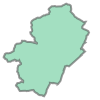

In [41]:
# multipolygon 추출 
boarder_2['geometry'][0]

In [243]:
import numpy as np
df_bus['행정구역'] = np.zeros_like(len(df_bus))
df_bus

,정류장_ID,정류장_이름,버스_위도,버스_경도,승차수,행정구역
0,219000619,신일비즈니스고등학교,37.683296,126.760592,3496.0,0
1,219000587,중앙공원삼거리,37.688934,126.776989,2666.0,0
2,219000624,문촌마을14.19단지,37.671011,126.752451,0.0,0
3,219000623,문촌마을14.19단지,37.671448,126.752452,298.0,0
5,219000586,중앙공원삼거리,37.688771,126.777412,25.0,0
...,...,...,...,...,...,...
2968,218000940,고양시청후문,37.659090,126.832676,788.0,0
2969,219000927,사리현동문아파트,37.699382,126.845347,5868.0,0
2970,218000530,서울시립고양병원입구,37.712236,126.852005,5483.0,0
2972,218001000,옥빛마을14.15단지,37.628699,126.833325,5023.0,0


In [258]:
index = range(len(boarder_2))
station =  gpd.GeoSeries(Point(df_bus.iloc[0]['버스_경도'], df_bus.iloc[0]['버스_위도']), index = index)
station = station.set_crs(epsg = 4326)
boarder_2['geometry'].covers(station)

/usr/local/lib/python3.6/dist-packages/geopandas/base.py:61: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return GeoSeries(geoms.data, index=index, crs=this.crs)


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
dtype: bool

In [254]:
from shapely.geometry import Point
from tqdm import tqdm_notebook
L = []
for bus_i in tqdm_notebook(range(len(df_bus))):
  index = range(len(boarder_2))
  station =  gpd.GeoSeries(Point(df_bus.iloc[bus_i]['버스_경도'], df_bus.iloc[bus_i]['버스_위도']), index = index)
  station = station.set_crs(epsg = 4326)
  for idx, T in enumerate(boarder_2['geometry'].covers(station)):
    if boarder_2['geometry'].covers(station).iloc[idx]:
      # print(boarder_2.iloc[idx]['EMD_KOR_NM'])
      L.append(boarder_2.iloc[idx]['EMD_KOR_NM'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return GeoSeries(geoms.data, index=index, crs=this.crs)
/usr/local/lib/python3.6/dist-packages/geopandas/base.py:61: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return GeoSeries(geoms.data, index=index, crs=this.crs)
/usr/local/lib/python3.6/dist-packages/geopandas/base.py:61: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return GeoSeries(geoms.data, index=index, crs=this.crs)
/usr/local/lib/python3.6/dist-packages/geopandas/base.py:61: FutureWarning:     You are passing non-geometry data to the GeoSeries cons

/usr/local/lib/python3.6/dist-packages/geopandas/base.py:61: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  return GeoSeries(geoms.data, index=index, crs=this.crs)


In [257]:
for i in range(len(L)):
  df_bus['행정구역'].iloc[i] = L[i]
df_bus

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,정류장_ID,정류장_이름,버스_위도,버스_경도,승차수,행정구역
0,219000619,신일비즈니스고등학교,37.683296,126.760592,3496.0,대화동
1,219000587,중앙공원삼거리,37.688934,126.776989,2666.0,일산동
2,219000624,문촌마을14.19단지,37.671011,126.752451,0.0,주엽동
3,219000623,문촌마을14.19단지,37.671448,126.752452,298.0,대화동
5,219000586,중앙공원삼거리,37.688771,126.777412,25.0,중산동
...,...,...,...,...,...,...
2968,218000940,고양시청후문,37.659090,126.832676,788.0,주교동
2969,219000927,사리현동문아파트,37.699382,126.845347,5868.0,사리현동
2970,218000530,서울시립고양병원입구,37.712236,126.852005,5483.0,내유동
2972,218001000,옥빛마을14.15단지,37.628699,126.833325,5023.0,화정동


In [305]:
df_bus = df_bus[['정류장_ID', '정류장_이름', '행정구역', '버스_위도', '버스_경도', '승차수']]
df_bus

,정류장_ID,정류장_이름,행정구역,버스_위도,버스_경도,승차수
0,219000619,신일비즈니스고등학교,대화동,37.683296,126.760592,3496.0
1,219000587,중앙공원삼거리,일산동,37.688934,126.776989,2666.0
2,219000624,문촌마을14.19단지,주엽동,37.671011,126.752451,0.0
3,219000623,문촌마을14.19단지,대화동,37.671448,126.752452,298.0
5,219000586,중앙공원삼거리,중산동,37.688771,126.777412,25.0
...,...,...,...,...,...,...
2968,218000940,고양시청후문,주교동,37.659090,126.832676,788.0
2969,219000927,사리현동문아파트,사리현동,37.699382,126.845347,5868.0
2970,218000530,서울시립고양병원입구,내유동,37.712236,126.852005,5483.0
2972,218001000,옥빛마을14.15단지,화정동,37.628699,126.833325,5023.0


In [306]:
df_bus.to_csv('bus_merged.csv', index= False)